In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [49]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

In [50]:
L, R = -3, 3
a, b = -3, 3
N = 20

x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)

### 2. Вариационный ряд и эмпирическая функция распределения

In [51]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.3077712105797019: 1,
 0.5665265042124155: 1,
 0.5929848732801393: 1,
 0.6042005320398602: 1,
 0.6735284540444813: 1,
 1.0348475671957411: 1,
 1.1056397811631011: 1,
 1.114309818132343: 1,
 1.3866583191115185: 1,
 1.4487313056572049: 1,
 1.4707360103251403: 1,
 1.5937741341319576: 1,
 1.746664601606363: 1,
 2.4452266967648404: 1,
 2.512314237024622: 1,
 2.5478134165925246: 1,
 2.5545787904363517: 1,
 2.5960349026307328: 1,
 2.665823411375497: 1,
 2.67101793760442: 1}

# Lab 4

<img src="images/assigment4.jpg" width="800">

## 1. Доверительный интервал для математического ожидания СВ

_1.1. В соответствии с вариантом сформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины._

Формула несмещенной оценки математического ожидания: $\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$

In [52]:
mY = sum(y) / len(y)
mY

1.581959125195448

_1.2. Найти точечную оценку дисперсии случайной величины._

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [53]:
S = sum([(y[i] - mY)**2  for i in range(N)]) / (N - 1)
S

0.6912231198021577

_1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости._

Уровни значимости $\gamma$: 0.9, 0.95, 0.98, 0.99, 0.999. По таблице Стьюдента определим значения $t_{\gamma, n-1}$ ($n-1=19$ степеней свободы) для всех уровней значимости: $t_{0.9, 19}=1.33,t_{0.95, 19}=1.729, t_{0.98, 19}=2.205, t_{0.99, 19}=2.539, t_{0.999, 19}=3.579$

Построим доверительный интервал для каждого $t$:

$$\bar{x}-\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [54]:
from scipy.stats import t

gamma = [0.90, 0.95, 0.98, 0.99, 0.999]
delta = []

for i in range(len(gamma)):
    t_ = t.ppf(gamma[i], N - 1)
    interval =  math.sqrt(S) * t_ / math.sqrt(N - 1)
    y1, y2 = mY - interval, mY + interval
    delta.append(y2 - y1)
    print(f"\nДоверительный интервал для мат. ожидания с уровнем значимости gamma = {gamma[i]}\n{y1} < m[y] < {y2}")


Доверительный интервал для мат. ожидания с уровнем значимости gamma = 0.9
1.3287137576352719 < m[y] < 1.835204492755624

Доверительный интервал для мат. ожидания с уровнем значимости gamma = 0.95
1.2521515098740426 < m[y] < 1.9117667405168532

Доверительный интервал для мат. ожидания с уровнем значимости gamma = 0.98
1.161443540655604 < m[y] < 2.0024747097352917

Доверительный интервал для мат. ожидания с уровнем значимости gamma = 0.99
1.097588642102813 < m[y] < 2.066329608288083

Доверительный интервал для мат. ожидания с уровнем значимости gamma = 0.999
0.8992391980266934 < m[y] < 2.2646790523642024


_1.4. Построить график зависимости величины доверительного интервала от уровня значимости._

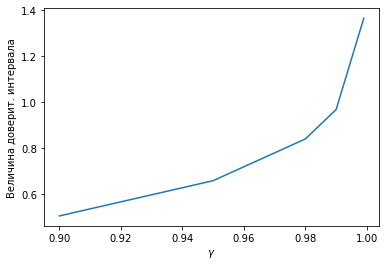

In [55]:
plt.plot(gamma, delta)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения ( задание 2, п.3)._

Т.к. распределение равномерное на отрезке [0;3], то Dx = 0.75

Формула доверительного интервала для математического ожидания при известной дисперсии:
$$\bar{x}-\frac{\sigma \cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{\sigma \cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [56]:
Dx = 0.75

sigma = math.sqrt(Dx)
delta_t = []

for i in range(len(gamma)):
    t_ = t.ppf(gamma[i], N - 1)
    interval =  sigma * t_ / math.sqrt(N - 1)
    y1, y2 = mY - interval, mY + interval
    delta_t.append(y2 - y1)
    print("\nДоверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma =", gamma[i], "\n", y1, "< m[y] <", y2)


Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.9 
 1.3181662790588458 < m[y] < 1.84575197133205

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.95 
 1.2384152714170127 < m[y] < 1.9255029789738831

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.98 
 1.1439293836871318 < m[y] < 2.019988866703764

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.99 
 1.0774149767651484 < m[y] < 2.0865032736257474

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.999 
 0.8708044279265034 < m[y] < 2.2931138224643925


_1.7. Построить график зависимости величины доверительного интервала от уровня значимости._

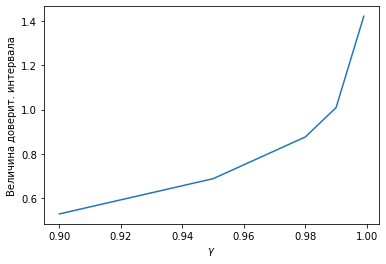

In [57]:
plt.plot(gamma, delta_t)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7._

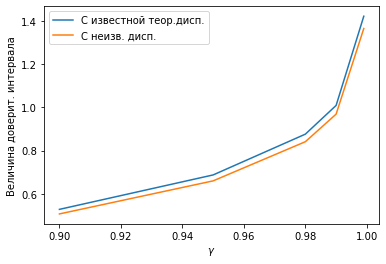

In [58]:
plt.plot(gamma, delta_t, label = "С известной теор.дисп.")
plt.plot(gamma, delta, label = "С неизв. дисп.")
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.legend()
plt.show()

_1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150_

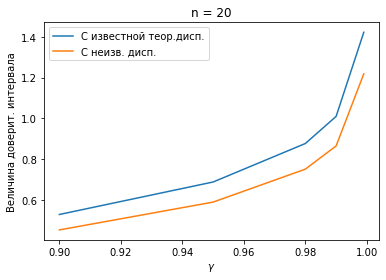

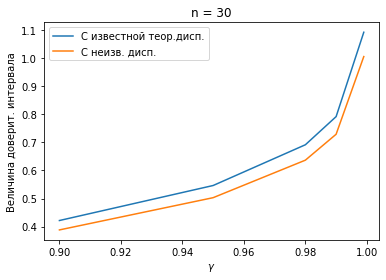

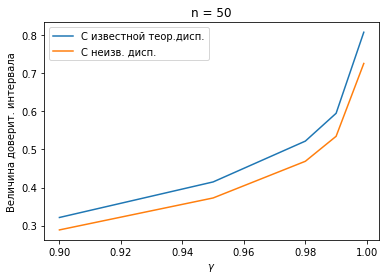

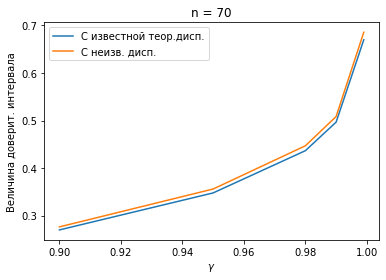

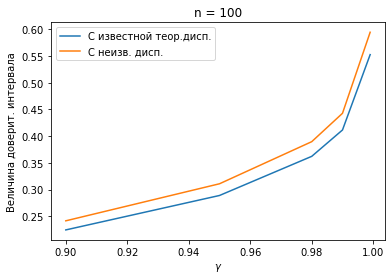

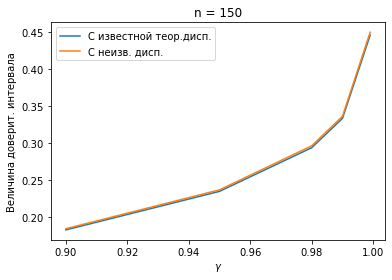

In [59]:
values = [20, 30, 50, 70, 100, 150]
deltas = []

for value in values:
    N = value
    x = sorted([get_x(a, b) for i in range(N)])
    y = get_y(x)
    
    mY = sum(y) / len(y)
    
    S = sum([(y[i] - mY)**2  for i in range(N)]) / (N - 1)

    gamma = [0.90, 0.95, 0.98, 0.99, 0.999]
    delta = []

    for i in range(len(gamma)):
        t_ = t.ppf(gamma[i], N - 1)
        interval =  math.sqrt(S) * t_ / math.sqrt(N - 1)
        y1, y2 = mY - interval, mY + interval
        delta.append(y2 - y1)
    deltas.append(delta)
        
    Dx = 0.75

    sigma = math.sqrt(Dx)
    delta_t = []

    for i in range(len(gamma)):
        t_ = t.ppf(gamma[i], N - 1)
        interval =  sigma * t_ / math.sqrt(N - 1)
        y1, y2 = mY - interval, mY + interval
        delta_t.append(y2 - y1)
        
    plt.plot(gamma, delta_t, label = "С известной теор.дисп.")
    plt.plot(gamma, delta, label = "С неизв. дисп.")
    plt.xlabel("$\gamma$")
    plt.ylabel("Величина доверит. интервала")
    plt.title('n = ' + str(N))
    plt.legend()
    plt.show()

_1.10. Построить графики зависимости величины доверительного интервала от объема выборки._

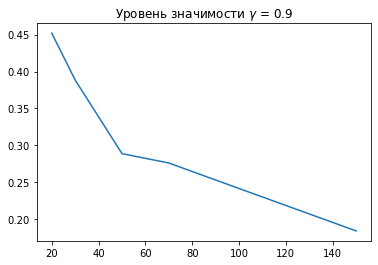

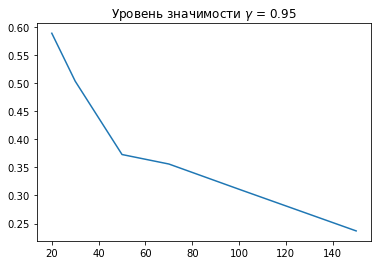

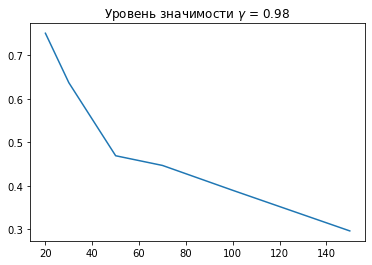

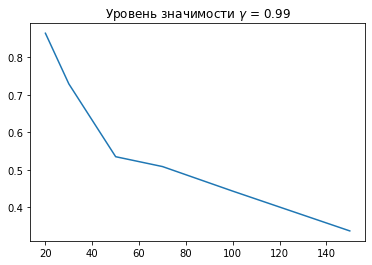

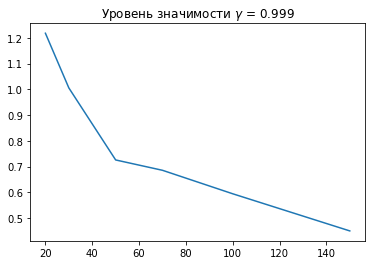

In [60]:
for j in range(len(gamma)): 
    plt.title(f'Уровень значимости $\gamma$ = {gamma[j]}')
    plt.plot(values, [deltas[i][j] for i in range(len(values))])
    plt.show()

## 2. Доверительный интервал для дисперсии СВ

_2.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины._

Формула несмещенной оценки дисперсии:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [114]:
N = 20
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
    
mY = sum(y) / len(y)
    
S = sum([(y[i] - mY)**2  for i in range(N)]) / (N - 1)
S

0.5026100365015538

_2.2. Найти точечную оценку математического ожидания случайной величины._

Формула несмещенной оценки мат. ожидания:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [115]:
mY

1.598461410177984

_2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости._

Уровни значимости $\gamma$: 0.9, 0.95, 0.98, 0.99, 0.999. Кол-во степеней свободы: $n-1=19$. По таблице Хи-квадрат определяем значения $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$.

Доверительный интервал строится по формуле:

$$\frac{n\cdot s^2}{\chi^2_{\frac{1-\gamma}{2}, n-1}}\le D_x <\frac{n\cdot s^2}{\chi^2_{\frac{1+\gamma}{2}, n-1}}$$

In [116]:
from scipy.stats import chi2

delta = []

for i in range(len(gamma)):
    chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, N - 1), chi2.ppf((1 - gamma[i]) / 2, N - 1)
    
    y1, y2 = N * S / chi_1, N * S / chi_2
    delta.append(y2 - y1)
    print("\nДоверительный интервал для дисперсии с уровнем значимости gamma =", gamma[i], "\n", y1, "< D[y] <", y2)


Доверительный интервал для дисперсии с уровнем значимости gamma = 0.9 
 0.333477919204764 < D[y] < 0.993593728364402

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.95 
 0.30598139280481457 < D[y] < 1.1286343825175722

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.98 
 0.27775516233461134 < D[y] < 1.3169863461925988

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.99 
 0.26053947144637685 < D[y] < 1.4687671931573532

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.999 
 0.21865387481610463 < D[y] < 2.0463161141042727


_2.4. Построить график зависимости величины доверительного интервала от уровня значимости._

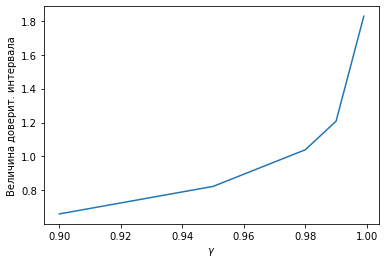

In [117]:
plt.plot(gamma, delta)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3)._

Т.к. распределение равномерное на отрезке [0;3], то mx = 1.5

In [118]:
mx = 1.5
mx

1.5

_2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости._

In [119]:
delta_t = []

for i in range(len(gamma)): 
    chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, N - 1), chi2.ppf((1 - gamma[i]) / 2, N - 1)
    s = sum([(y[i] - mx)**2  for i in range(N)])
    y1, y2 = s / chi_1, s / chi_2
    delta_t.append(y2 - y1)
    print("\nДоверительный интервал для дисперсии с уровнем значимости gamma =", gamma[i], "\n", y1, "< D[y] <", y2)


Доверительный интервал для дисперсии с уровнем значимости gamma = 0.9 
 0.323236348982717 < D[y] < 0.9630790844998371

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.95 
 0.29658427911128077 < D[y] < 1.0939724525429138

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.98 
 0.2692249153954151 < D[y] < 1.276539865723448

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.99 
 0.25253794229327375 < D[y] < 1.4236593119985907

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.999 
 0.21193871052998955 < D[y] < 1.983470903155728


_2.7. Построить график зависимости величины доверительного интервала от уровня значимости._

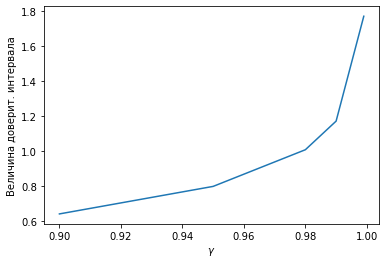

In [120]:
plt.plot(gamma, delta_t)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7._

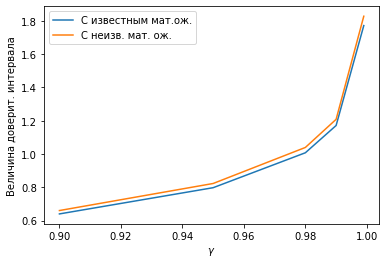

In [121]:
plt.plot(gamma, delta_t, label = "С известным мат.ож.")
plt.plot(gamma, delta, label = "С неизв. мат. ож.")
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.legend()
plt.show()

_2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

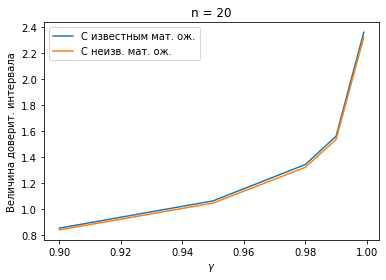

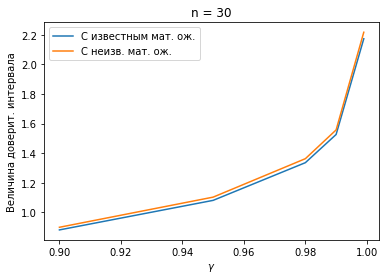

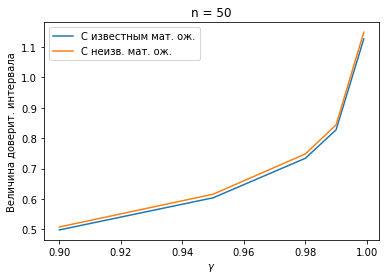

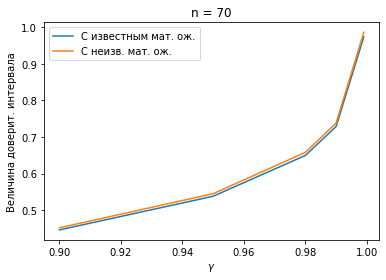

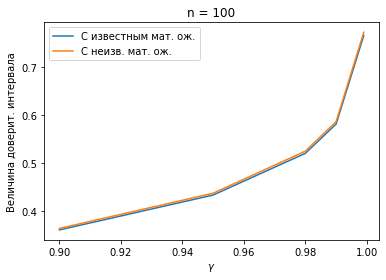

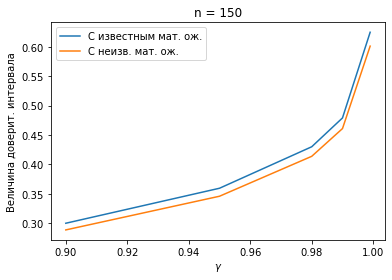

In [122]:
values = [20, 30, 50, 70, 100, 150]
deltas = []

for value in values:
    N = value
    x = sorted([get_x(a, b) for i in range(N)])
    y = get_y(x)
    
    mY = sum(y) / len(y)
    
    S = sum([(y[i] - mY)**2  for i in range(N)]) / (N - 1)

    delta = []
    for i in range(len(gamma)):
        chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, N - 1), chi2.ppf((1 - gamma[i]) / 2, N - 1)
    
        y1, y2 = N * S / chi_1, N * S / chi_2
        delta.append(y2 - y1)
    deltas.append(delta)
    
    mx = 1.5
    delta_t = []
    for i in range(len(gamma)): 
        chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, N - 1), chi2.ppf((1 - gamma[i]) / 2, N - 1)
        s = sum([(y[i] - mx)**2  for i in range(N)])
        y1, y2 = s / chi_1, s / chi_2
        delta_t.append(y2 - y1)
        
    plt.plot(gamma, delta_t, label = "С известным мат. ож.")
    plt.plot(gamma, delta, label = "С неизв. мат. ож.")
    plt.xlabel("$\gamma$")
    plt.ylabel("Величина доверит. интервала")
    plt.title('n = ' + str(value))
    plt.legend()
    plt.show()

_2.10. Построить графики зависимости величины доверительного интервала от объема выборки._

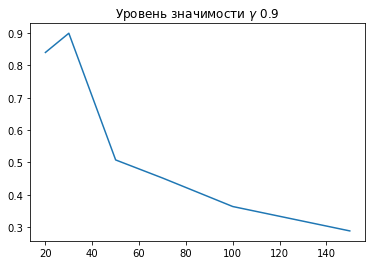

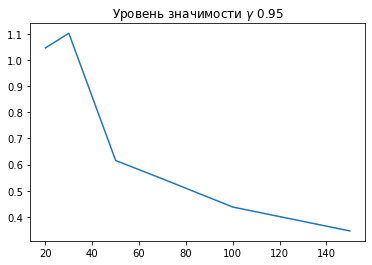

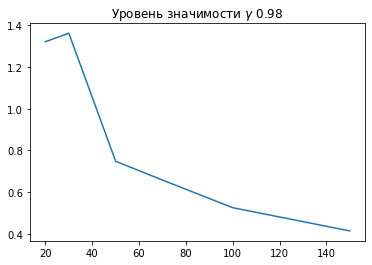

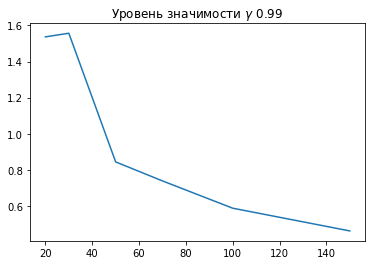

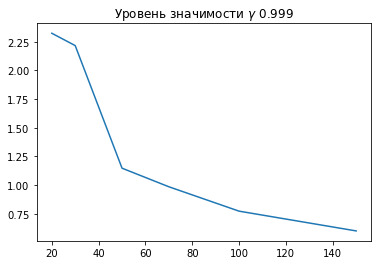

In [123]:
for j in range(len(gamma)): 
    plt.title(f'Уровень значимости $\gamma$ {gamma[j]}')
    plt.plot(values, [deltas[i][j] for i in range(len(values))])
    plt.show()